# Parte 1 - DataFrame
Catharina Bender Rodrigues

In [ ]:
# Importar bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# [1] Leitura do Arquivo LHE

In [ ]:
# Função para ler arquivo LHE
# Foi feito o upload dos arquivos de sinal e fundo no espaço do notebook
# Nome do arquivo de SINAL: de "unweighted_events.lhe" para "sinal.lhe"
# Nome do arquivo de FUNDO: de "unweighted_events.lhe" para "fundo.lhe"

def read_lhe(filename):
    events = []
    with open(filename, 'r') as f:
        lines = f.readlines()

    inside_event = False
    event_id = -1  # contador de eventos
    for line in lines:
        if "<event>" in line:
            inside_event = True
            particles = []
            event_id += 1
            continue
        if "</event>" in line:
            inside_event = False
            events.append(particles)
            continue
        if inside_event:
            parts = line.strip().split()
            if len(parts) > 10:  # linha de partícula
                pid = int(parts[0])          # Particle ID
                status = int(parts[1])       # Status da partícula
                px, py, pz, E, m = map(float, parts[6:11])
                particles.append({
                    "event_id": event_id,    # Identificador do evento
                    "pid": pid,              # Particle ID
                    "status": status,        # Status extraído do LHE
                    "px": px,                # Momento X
                    "py": py,                # Momento Y
                    "pz": pz,                # Momento Z
                    "E": E,                  # Energia total
                    "m": m,                  # Massa invariante
                    "pT": np.sqrt(px**2 + py**2)  # Momento transversal
                })
    # Achata lista de eventos em lista de partículas
    return pd.DataFrame([p for ev in events for p in ev])

In [ ]:
# Ler sinal e fundo
df_signal = read_lhe("sinal.lhe")
df_background = read_lhe("fundo.lhe")

# [2a] Investigação Preliminar do Arquivo

In [ ]:
# Número total de eventos únicos no primeiro DataFrame (df_signal)
num_events_signal = df_signal["event_id"].nunique()

print(f"Número total de eventos no sinal: {num_events_signal}")

Número total de eventos no sinal: 10000


In [ ]:
# Número total de eventos únicos no DataFrame de fundo
num_events_background = df_background["event_id"].nunique()

print(f"Número total de eventos no fundo: {num_events_background}")


Número total de eventos no fundo: 10000


# [2b] Investigação Preliminar dos Eventos

In [ ]:
# Contagem de partículas por status no sinal
tabela_signal = df_signal.groupby("status")["pid"].value_counts().unstack(fill_value=0)

# Contagem de partículas por status no fundo
tabela_background = df_background.groupby("status")["pid"].value_counts().unstack(fill_value=0)

print("Tabela de partículas no sinal:")
print(tabela_signal)

print("\nTabela de partículas no fundo:")
print(tabela_background)

Tabela de partículas no sinal:
pid       -13    -11  -4   -3    -2    -1     1     2    3    4      11  \
status                                                                    
-1          0      0  284  779  3634  5303  5303  3634  779  284      0   
 1      10000  10000    0    0     0     0     0     0    0    0  10000   
 2          0      0    0    0     0     0     0     0    0    0      0   

pid        13     23  
status                
-1          0      0  
 1      10000      0  
 2          0  20000  

Tabela de partículas no fundo:
pid       -13    -11   -4   -3    -2   -1    1     2    3     4      11     13
status                                                                        
-1          0      0  1375  223  7663  739  739  7663  223  1375      0      0
 1      10000  10000     0    0     0    0    0     0    0     0  10000  10000


____________
## Processo do Sinal
____________
Partículas envolvidas
- Léptons:
  - Elétron (pid = 11), pósitron (pid = -11)
  - Múon (pid = 13), anti-múon (pid = -13)
- Quarks:
  - Quarks leves (pid = ±1, ±2, ±3, ±4 → u, d, s, c)
- Ressonância:
  - Bóson Z (pid = 23)

____________
- `status = -1`: partículas iniciais (quarks ou léptons que participam da colisão, mas nestes dados, apenas QUARKS).
- `status = 1`: partículas finais detectáveis (resultados do decaimento do bóson Z: pares de léptons ou pares de quarks, mas neste dados, apenas LÉPTONS).
- `status = 2`: intermediárias (a ressonância Z que é produzida e depois decai).
____________

$pp\rightarrow q \bar{q} \rightarrow Z\rightarrow \ell ^+\ell ^-\quad (\ell =e,\mu )$

____________

____________
## Processo do Fundo
____________
Partículas envolvidas
- Léptons:
  - Elétron (pid = 11), pósitron (pid = -11)
  - Múon (pid = 13), anti-múon (pid = -13)
- Quarks:
  - Quarks leves (pid = ±1, ±2, ±3, ±4 → u, d, s, c)
- Ressonância:
  - Não há o bóson Z real (pid = 23) nos dados de fundo.
  - O processo é mediado por um fóton virtual ($\gamma ^*$) ou um Z fora da ressonância.

Isso indica que o fundo corresponde a produção direta de pares de léptons via interação eletrofraca (processo Drell–Yan), sem passar por uma ressonância intermediária.

____________
- `status = -1`: partículas iniciais: apenas quarks vindos dos prótons.
- `status = 1`: partículas finais detectáveis: pares de léptons (e⁺e⁻ ou μ⁺μ⁻)
- `status = 2`: nao tem.
____________

$pp\; \; \rightarrow \; \; q\bar {q}\; \; \rightarrow \; \; \gamma ^*/Z^*\; \; \rightarrow \; \; \ell ^+\ell ^-\quad (\ell =e,\mu )$

____________

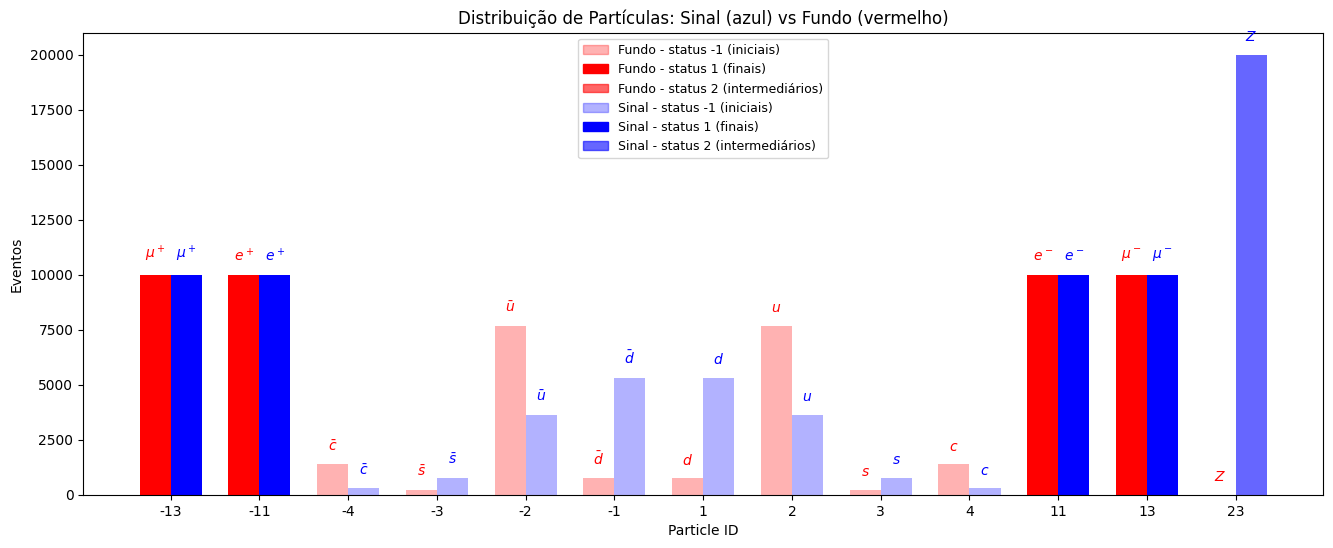

In [ ]:
import matplotlib.patches as mpatches

# Dicionário PID → Nome da partícula em LaTeX
pid_names_latex = {
    11: r"$e^-$", -11: r"$e^+$",
    13: r"$\mu^-$", -13: r"$\mu^+$",
    2: r"$u$", -2: r"$\bar{u}$",
    4: r"$c$", -4: r"$\bar{c}$",
    1: r"$d$", -1: r"$\bar{d}$",
    3: r"$s$", -3: r"$\bar{s}$",
    23: r"$Z$",
}
# Agrupar por pid e status
counts_signal = df_signal.groupby(["pid","status"]).size().reset_index(name="count")
counts_background = df_background.groupby(["pid","status"]).size().reset_index(name="count")

# Transparências por status
alpha_map = {-1:0.3, 1:1.0, 2:0.6}

# PIDs únicos
pids = sorted(set(counts_signal["pid"]).union(set(counts_background["pid"])))
x = np.arange(len(pids))

bar_width = 0.35

plt.figure(figsize=(16,6))

# Plotar barras para cada status

for status in [-1,1,2]:
    # Fundo
    fundo_vals = [counts_background[(counts_background.pid==pid) & (counts_background.status==status)]["count"].sum() for pid in pids]
    plt.bar(x-bar_width/2, fundo_vals, width=bar_width, color='red', alpha=alpha_map[status])

    # Sinal
    sinal_vals = [counts_signal[(counts_signal.pid==pid) & (counts_signal.status==status)]["count"].sum() for pid in pids]
    plt.bar(x+bar_width/2, sinal_vals, width=bar_width, color='blue', alpha=alpha_map[status])

# Adicionar rótulos LaTeX em cima das barras
for i,pid in enumerate(pids):
    total_sinal = counts_signal[counts_signal.pid==pid]["count"].sum()
    total_fundo = counts_background[counts_background.pid==pid]["count"].sum()
    if pid in pid_names_latex:
        plt.text(i-bar_width/2, total_fundo+500, pid_names_latex[pid], ha='center', va='bottom', fontsize=10, color='red')
        plt.text(i+bar_width/2, total_sinal+500, pid_names_latex[pid], ha='center', va='bottom', fontsize=10, color='blue')

plt.xticks(x, pids)
plt.xlabel("Particle ID")
plt.ylabel("Eventos")
plt.title("Distribuição de Partículas: Sinal (azul) vs Fundo (vermelho)")

# Criar legenda com gradiente de cores (status)
legend_patches = [
    mpatches.Patch(color='red', alpha=alpha_map[-1], label="Fundo - status -1 (iniciais)"),
    mpatches.Patch(color='red', alpha=alpha_map[1], label="Fundo - status 1 (finais)"),
    mpatches.Patch(color='red', alpha=alpha_map[2], label="Fundo - status 2 (intermediários)"),
    mpatches.Patch(color='blue', alpha=alpha_map[-1], label="Sinal - status -1 (iniciais)"),
    mpatches.Patch(color='blue', alpha=alpha_map[1], label="Sinal - status 1 (finais)"),
    mpatches.Patch(color='blue', alpha=alpha_map[2], label="Sinal - status 2 (intermediários)"),
]

plt.legend(handles=legend_patches, loc="upper center", fontsize=9)
plt.show()


# [3] Exploração do Conteúdo

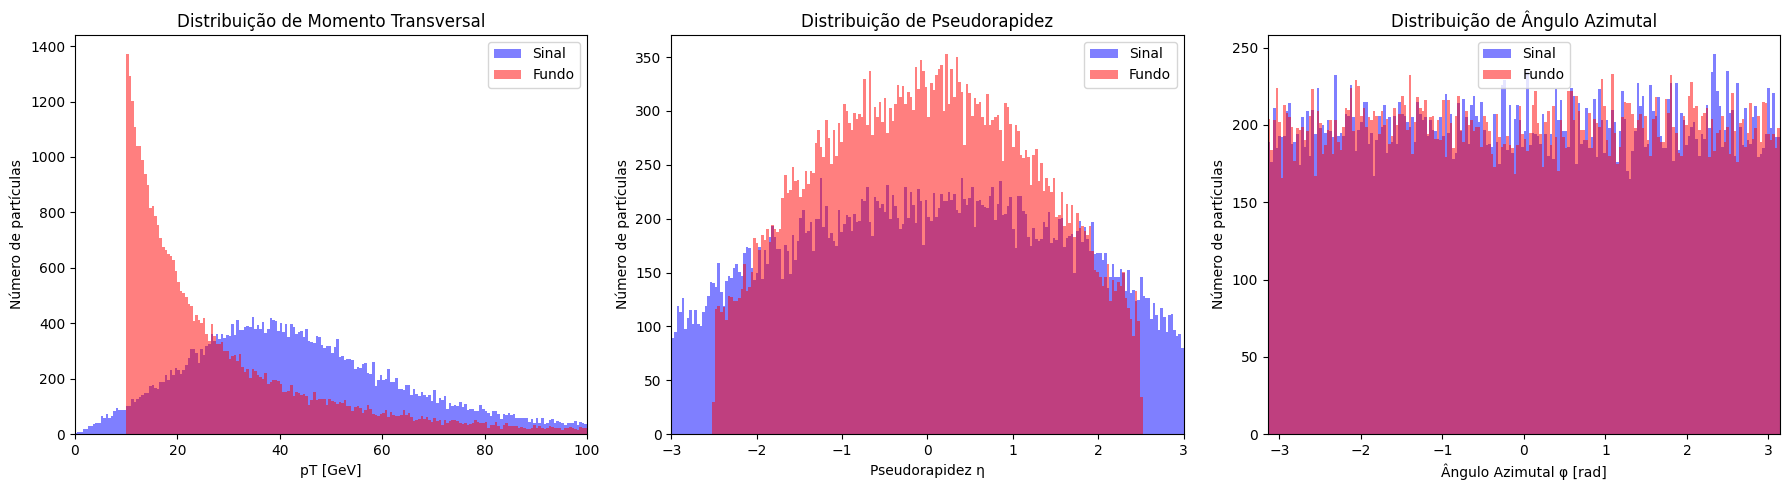

In [ ]:
# Selecionar apenas partículas finais (status = 1), excluindo neutrinos (pid = ±12, ±14, ±16)
final_signal = df_signal[(df_signal["status"] == 1) & (~df_signal["pid"].isin([12, -12, 14, -14, 16, -16]))]
final_background = df_background[(df_background["status"] == 1) & (~df_background["pid"].isin([12, -12, 14, -14, 16, -16]))]

# Calcular pseudorapidez e phi
def compute_kinematics(df):
    p = np.sqrt(df["px"]**2 + df["py"]**2 + df["pz"]**2)
    eta = 0.5 * np.log((p + df["pz"]) / (p - df["pz"] + 1e-12))  # evitar divisão por zero
    phi = np.arctan2(df["py"], df["px"])
    df = df.copy()
    df["eta"] = eta
    df["phi"] = phi
    return df

final_signal = compute_kinematics(final_signal)
final_background = compute_kinematics(final_background)

# Histogramas comparativos
fig, axs = plt.subplots(1, 3, figsize=(18,5))

# pT
axs[0].hist(final_signal["pT"], bins=200, range=(0,100), alpha=0.5, color="blue", label="Sinal")
axs[0].hist(final_background["pT"], bins=200, range=(0,100), alpha=0.5, color="red", label="Fundo")
axs[0].set_xlabel("pT [GeV]")
axs[0].set_ylabel("Número de partículas")
axs[0].set_title("Distribuição de Momento Transversal")
axs[0].set_xlim(0,100)
axs[0].legend()

# η
axs[1].hist(final_signal["eta"], bins=200, range=(-3,3), alpha=0.5, color="blue", label="Sinal")
axs[1].hist(final_background["eta"], bins=200, range=(-3,3), alpha=0.5, color="red", label="Fundo")
axs[1].set_xlabel("Pseudorapidez η")
axs[1].set_ylabel("Número de partículas")
axs[1].set_title("Distribuição de Pseudorapidez")
axs[1].set_xlim(-3,3)
axs[1].legend()

# φ
axs[2].hist(final_signal["phi"], bins=200, range=(-np.pi, np.pi), alpha=0.5, color="blue", label="Sinal")
axs[2].hist(final_background["phi"], bins=200, range=(-np.pi, np.pi), alpha=0.5, color="red", label="Fundo")
axs[2].set_xlabel("Ângulo Azimutal φ [rad]")
axs[2].set_ylabel("Número de partículas")
axs[2].set_title("Distribuição de Ângulo Azimutal")
axs[2].set_xlim(-np.pi,np.pi)
axs[2].legend()

plt.tight_layout()
plt.show()

In [ ]:
# Eventos que entram em cada histograma (pelas faixas)
evt_pt_signal = final_signal[(final_signal["pT"] >= 0) & (final_signal["pT"] <= 100)]["event_id"].nunique()
evt_pt_background = final_background[(final_background["pT"] >= 0) & (final_background["pT"] <= 100)]["event_id"].nunique()

evt_eta_signal = final_signal[(final_signal["eta"] >= -3) & (final_signal["eta"] <= 3)]["event_id"].nunique()
evt_eta_background = final_background[(final_background["eta"] >= -3) & (final_background["eta"] <= 3)]["event_id"].nunique()

evt_phi_signal = final_signal[(final_signal["phi"] >= -np.pi) & (final_signal["phi"] <= np.pi)]["event_id"].nunique()
evt_phi_background = final_background[(final_background["phi"] >= -np.pi) & (final_background["phi"] <= np.pi)]["event_id"].nunique()

print("Eventos representados (pT 0–100 GeV): Sinal =", evt_pt_signal, "| Fundo =", evt_pt_background, " - - Event S / Event F = ", round(evt_pt_signal / evt_pt_background, 4))
print("Eventos representados (η −3–+3): Sinal =", evt_eta_signal, "| Fundo =", evt_eta_background, " - - Event S / Event F = ", round(evt_eta_signal / evt_eta_background, 4))
print("Eventos representados (φ −π–+π): Sinal =", evt_phi_signal, "| Fundo =", evt_phi_background, " - - Event S / Event F = ", round(evt_phi_signal / evt_phi_background, 4))


Eventos representados (pT 0–100 GeV): Sinal = 9995 | Fundo = 9988  - - Event S / Event F =  1.0007
Eventos representados (η −3–+3): Sinal = 9973 | Fundo = 10000  - - Event S / Event F =  0.9973
Eventos representados (φ −π–+π): Sinal = 10000 | Fundo = 10000  - - Event S / Event F =  1.0


Os histogramas gerados não apresentam 100% dos eventos, no entando, as janelas de valores solicitados redúz para 99,95% (sinal) e 99,88% (fundo) dos eventos com o pT limitado entre 0 e 100 GeV, e 99,73% (sinal) para a restrição de η entre -3 e +3. Este nao é um corte/filtro significativo para se tirar conclusões. Outra forma de avaliar é a razão entre os eventos do sinal/fundo dos intervalos selecionado. Um bom filtro é um filtro que aumenta esta razão



# [4] Filtros e Cortes Cinemáticos

# Teste de outros cortes cinemático

### Pegar apenas eventos em que os leptons possuem um momento transversal mínimo (pT)

In [ ]:
# Selecionar apenas léptons finais (status=1, sem neutrinos)
leptons_signal = final_signal[final_signal["pid"].isin([11, -11, 13, -13])]
leptons_background = final_background[final_background["pid"].isin([11, -11, 13, -13])]

# Função para aplicar corte em pT mínimo por lépton
def apply_pt_cut(leptons_df, pt_min=25):
    # Agrupar por evento
    surviving_events = []
    for evt_id, group in leptons_df.groupby("event_id"):
        # Verificar se todos os léptons do evento passam no corte
        if (group["pT"] > pt_min).all():
            surviving_events.append(evt_id)
    return surviving_events

# Testar diferentes valores de corte
pt_thresholds = range(20, 40, 2)

results = []
for pt_min in pt_thresholds:
    surv_signal = apply_pt_cut(leptons_signal, pt_min)
    surv_background = apply_pt_cut(leptons_background, pt_min)

    eff_signal = len(surv_signal) / leptons_signal["event_id"].nunique()
    eff_background = len(surv_background) / leptons_background["event_id"].nunique()

    results.append({
        "pT_l_min [GeV]": pt_min,
        "Event Sinal": len(surv_signal),
        "Event Fundo": len(surv_background),
        "Eff Sinal": round(eff_signal, 4),
        "Eff Fundo": round(eff_background, 4),
        "Razão S/F": round(len(surv_signal) / max(len(surv_background),1), 4)
    })

# Mostrar tabela de resultados
df_results = pd.DataFrame(results)
print(df_results)


   pT_l_min [GeV]  Event Sinal  Event Fundo  Eff Sinal  Eff Fundo  Razão S/F
0              20         6311         1381     0.6311     0.1381     4.5699
1              22         5664         1067     0.5664     0.1067     5.3083
2              24         4892          823     0.4892     0.0823     5.9441
3              26         4211          650     0.4211     0.0650     6.4785
4              28         3464          525     0.3464     0.0525     6.5981
5              30         2812          417     0.2812     0.0417     6.7434
6              32         2216          333     0.2216     0.0333     6.6547
7              34         1690          270     0.1690     0.0270     6.2593
8              36         1253          225     0.1253     0.0225     5.5689
9              38          914          197     0.0914     0.0197     4.6396


Um pT_min de 30 GeV para os léptons aumentou a Razão S/F de 1.00 para 6.74.

In [ ]:
# Criando um dataframe com os eventos selecionados

# Definir o corte ótimo
pt_min_opt = 30

# Obter lista de eventos sobreviventes no sinal e no fundo (apenas IDs)
surv_signal_ids = apply_pt_cut(leptons_signal, pt_min_opt)
surv_background_ids = apply_pt_cut(leptons_background, pt_min_opt)

# Agora filtrar o DataFrame original para pegar TODAS as partículas desses eventos
selected1_signal_full = df_signal[df_signal["event_id"].isin(surv_signal_ids)].copy()
selected1_background_full = df_background[df_background["event_id"].isin(surv_background_ids)].copy()

print("Eventos de sinal completos selecionados:", selected1_signal_full["event_id"].nunique())
print("Eventos de fundo completos selecionados:", selected1_background_full["event_id"].nunique())

# Mostrar algumas linhas como exemplo
print(selected1_signal_full.head(5))

Eventos de sinal completos selecionados: 2812
Eventos de fundo completos selecionados: 417
    event_id  pid  status         px        py          pz           E  \
32         4   -3      -1  -0.000000   0.00000  164.566180  164.566180   
33         4    3      -1   0.000000  -0.00000  -89.517964   89.517964   
34         4   23       2 -31.855075 -51.91740   82.790790  145.049021   
35         4   23       2  31.855075  51.91740   -7.742574  109.035123   
36         4  -13       1 -65.032548 -23.57044   27.085545   74.286176   

             m         pT  
32    0.000000   0.000000  
33    0.000000   0.000000  
34  102.346184  60.911101  
35   90.102988  60.911101  
36    0.105660  69.172234  


### Testando outras formas de filtrar: através da massa invariante das particulas finais de cada evento

In [ ]:

from scipy.optimize import curve_fit

# construa m_ll dos pares selecionados (pT_min, qualidade, etc.)
def invariant_mass(l1, l2):
    E = l1["E"] + l2["E"]
    px = l1["px"] + l2["px"]
    py = l1["py"] + l2["py"]
    pz = l1["pz"] + l2["pz"]
    return np.sqrt(max(E**2 - (px**2 + py**2 + pz**2), 0))

def build_mll(df_full):
    leptons = df_full[df_full["pid"].isin([11,-11,13,-13])]
    mll = []
    for evt_id, g in leptons.groupby("event_id"):
        ls = g.to_dict("records")
        for i in range(len(ls)):
            for j in range(i+1, len(ls)):
                a, b = ls[i], ls[j]
                # mesmo sabor e cargas opostas
                if abs(a["pid"]) != abs(b["pid"]) or np.sign(a["pid"]) == np.sign(b["pid"]):
                    continue
                mll.append(invariant_mass(a,b))
    return np.array(mll)

# ajuste Gauss simples em janela ao redor do Z
def gauss(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

m_signal = build_mll(selected2_signal_full)  # use seu df já filtrado
# escolha janela para o ajuste (ex.: 86–96 GeV)
mask = (m_signal > 82) & (m_signal < 100)
hist, edges = np.histogram(m_signal[mask], bins=500, range=(86,96))
centers = 0.5*(edges[:-1] + edges[1:])

# chute inicial
A0 = hist.max()
mu0 = 91.2
sigma0 = 5.0

popt, pcov = curve_fit(gauss, centers, hist, p0=[A0, mu0, sigma0])
A, mu, sigma = popt

print(f"Resolução estimada (σ) ≈ {sigma:.2f} GeV, pico em {mu:.2f} GeV")


Resolução estimada (σ) ≈ 1.22 GeV, pico em 91.23 GeV


Esta resolução estava muito pequena, e com uma janela muito restrritiva, podemos perder eventos relevantes para a análise dos dados. Algumas referencias mostram um σ (resolução) da massa invariante de 1-2 GeV para os múons e 3-5 GeV para os elétrons, entao optou-se por uma janela de 4*σ = 4*1,22 = 4,88 GeV.

In [ ]:
# Função para calcular massa invariante de pares
def invariant_mass(l1, l2):
    E = l1["E"] + l2["E"]
    px = l1["px"] + l2["px"]
    py = l1["py"] + l2["py"]
    pz = l1["pz"] + l2["pz"]
    return np.sqrt(max(E**2 - (px**2 + py**2 + pz**2), 0))

# Função para aplicar janela de massa invariante
def apply_mass_window(df_full, mwin=(80,100)):
    surviving_events = []
    leptons = df_full[df_full["pid"].isin([11, -11, 13, -13])]
    for evt_id, group in leptons.groupby("event_id"):
        leptons_evt = group.to_dict("records")
        for i in range(len(leptons_evt)):
            for j in range(i+1, len(leptons_evt)):
                mll = invariant_mass(leptons_evt[i], leptons_evt[j])
                if mwin[0] < mll < mwin[1]:
                    surviving_events.append(evt_id)
                    break  # basta um par válido para aceitar o evento
    return surviving_events

# Aplicar janela de massa (em torno do valor de 91 GeV)
mass_Z = 91 # GeV
window = 4*sigma
mass_window = (mass_Z-window, mass_Z+window)
surv_signal_ids_mass = apply_mass_window(selected1_signal_full, mass_window)
surv_background_ids_mass = apply_mass_window(selected1_background_full, mass_window)

# Filtrar eventos completos novamente
selected2_signal_full = selected1_signal_full[selected1_signal_full["event_id"].isin(surv_signal_ids_mass)].copy()
selected2_background_full = selected1_background_full[selected1_background_full["event_id"].isin(surv_background_ids_mass)].copy()

print("Eventos de sinal após janela de massa:", selected2_signal_full["event_id"].nunique())
print("Eventos de fundo após janela de massa:", selected2_background_full["event_id"].nunique())
print("S/F = ", round(selected2_signal_full["event_id"].nunique() / selected2_background_full["event_id"].nunique(), 4))

# Mostrar algumas linhas como exemplo
print(selected2_signal_full.head(5))


Eventos de sinal após janela de massa: 2766
Eventos de fundo após janela de massa: 116
S/F =  23.8448
    event_id  pid  status         px        py          pz           E  \
32         4   -3      -1  -0.000000   0.00000  164.566180  164.566180   
33         4    3      -1   0.000000  -0.00000  -89.517964   89.517964   
34         4   23       2 -31.855075 -51.91740   82.790790  145.049021   
35         4   23       2  31.855075  51.91740   -7.742574  109.035123   
36         4  -13       1 -65.032548 -23.57044   27.085545   74.286176   

             m         pT  
32    0.000000   0.000000  
33    0.000000   0.000000  
34  102.346184  60.911101  
35   90.102988  60.911101  
36    0.105660  69.172234  


Esta Razão de Eventos Sinal/Fundo de aproximadadamente 23,8 parece promissor pois significa que foi possível descartar mais eventos irrelevantes do fundo do que do sinal.

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


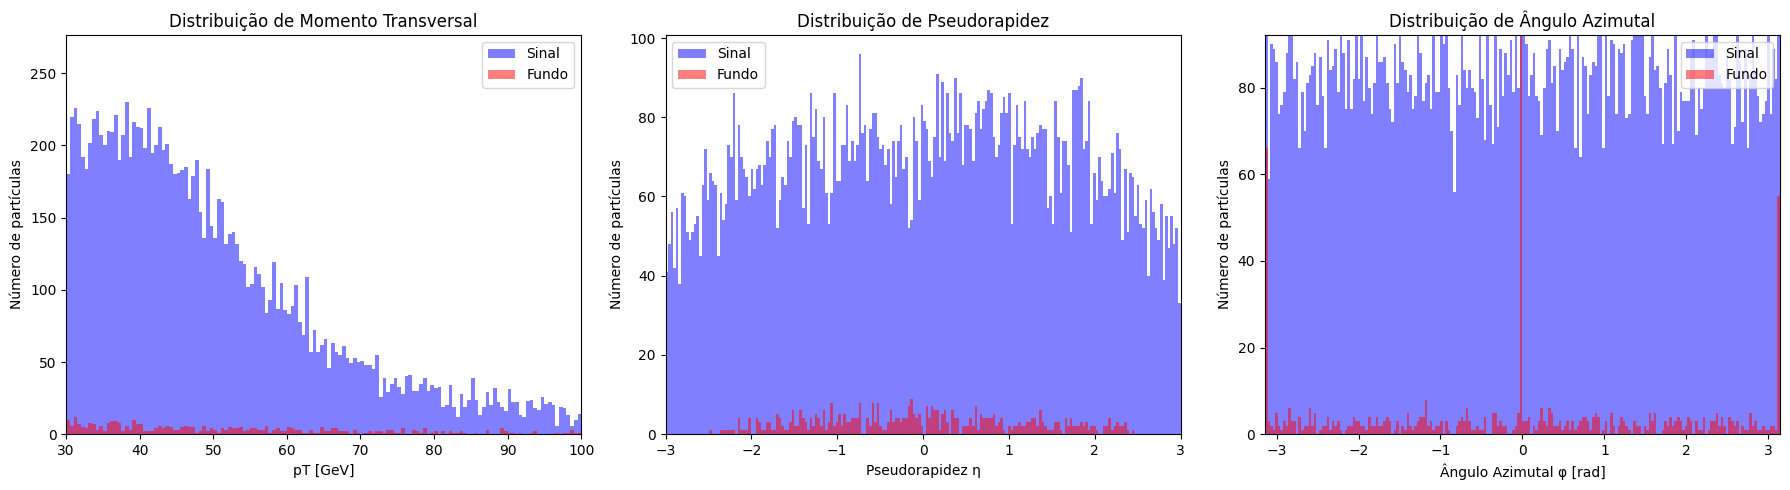

In [ ]:
selected2_signal = compute_kinematics(selected2_signal_full)
selected2_background = compute_kinematics(selected2_background_full)

# Histogramas comparativos
fig, axs = plt.subplots(1, 3, figsize=(18,5))

# pT
axs[0].hist(selected2_signal["pT"], bins=200, range=(0,100), alpha=0.5, color="blue", label="Sinal")
axs[0].hist(selected2_background["pT"], bins=200, range=(0,100), alpha=0.5, color="red", label="Fundo")
axs[0].set_xlabel("pT [GeV]")
axs[0].set_ylabel("Número de partículas")
axs[0].set_title("Distribuição de Momento Transversal")
axs[0].set_xlim(pt_min_opt,100)
axs[0].set_ylim(0,selected2_signal_full["event_id"].nunique()/10)
axs[0].legend()

# η
axs[1].hist(selected2_signal["eta"], bins=200, range=(-3,3), alpha=0.5, color="blue", label="Sinal")
axs[1].hist(selected2_background["eta"], bins=200, range=(-3,3), alpha=0.5, color="red", label="Fundo")
axs[1].set_xlabel("Pseudorapidez η")
axs[1].set_ylabel("Número de partículas")
axs[1].set_title("Distribuição de Pseudorapidez")
axs[1].set_xlim(-3,3)
axs[1].legend()

# φ
axs[2].hist(selected2_signal["phi"], bins=200, range=(-np.pi, np.pi), alpha=0.5, color="blue", label="Sinal")
axs[2].hist(selected2_background["phi"], bins=200, range=(-np.pi, np.pi), alpha=0.5, color="red", label="Fundo")
axs[2].set_xlabel("Ângulo Azimutal φ [rad]")
axs[2].set_ylabel("Número de partículas")
axs[2].set_title("Distribuição de Ângulo Azimutal")
axs[2].set_xlim(-np.pi,np.pi)
axs[2].set_ylim(0,selected2_signal_full["event_id"].nunique()/30)
axs[2].legend()

plt.tight_layout()
plt.show()

Nos histogramas acima pode ser observar um redução significativa do fundo com relação ao sinal.